In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk
from scipy.stats import ttest_rel
import numpy as np

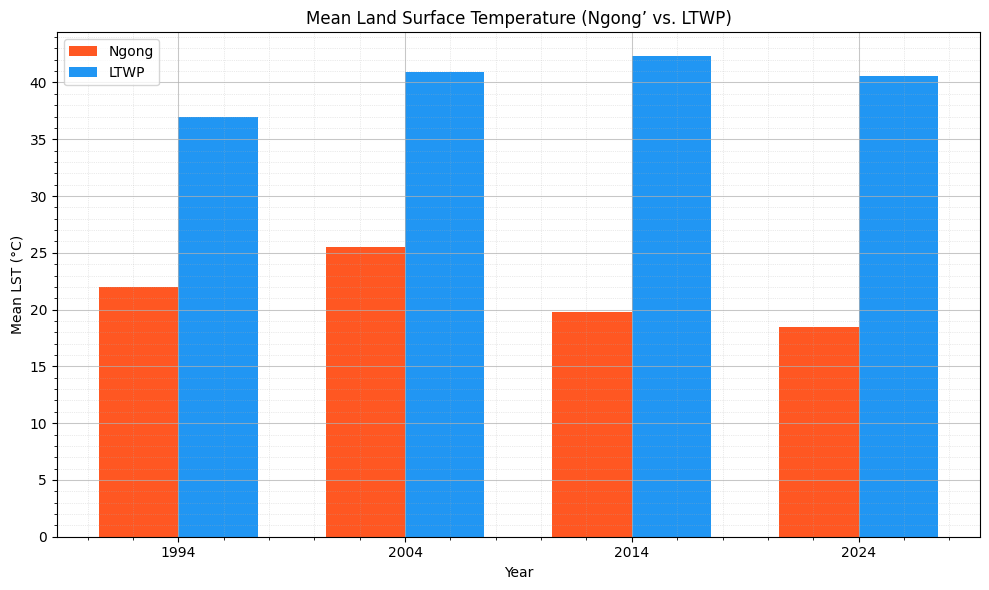

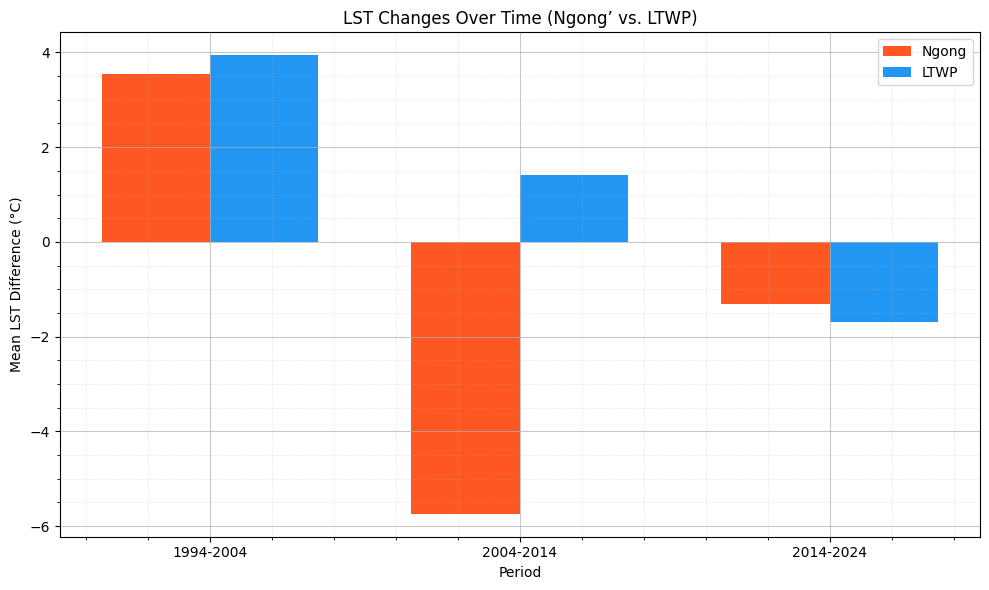

In [13]:
# Data from GEE results
data = {
    'Year': [1994, 2004, 2014, 2024],
    'Ngong_LST': [21.98, 25.52, 19.78, 18.47],
    'LTWP_LST': [36.95, 40.88, 42.30, 40.60]
}
df = pd.DataFrame(data)

# Comparative bar chart for mean LST
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df['Year']))
plt.bar([i - bar_width/2 for i in x], df['Ngong_LST'], bar_width, label='Ngong', color='#FF5722')
plt.bar([i + bar_width/2 for i in x], df['LTWP_LST'], bar_width, label='LTWP', color='#2196F3')
plt.xlabel('Year')
plt.ylabel('Mean LST (°C)')
plt.title('Mean Land Surface Temperature (Ngong’ vs. LTWP)')
plt.xticks(x, df['Year'])
plt.legend()
plt.tight_layout()
plt.grid(which='major', linestyle='-', linewidth=0.75, alpha=0.7)
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
plt.minorticks_on()
plt.savefig('lst_comparison.png', dpi=300)
plt.show()

# LST differences chart
diff_data = {
    'Period': ['1994-2004', '2004-2014', '2014-2024'],
    'Ngong_Diff': [3.54, -5.74, -1.31],
    'LTWP_Diff': [3.94, 1.41, -1.70]
}
df_diff = pd.DataFrame(diff_data)

plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in range(len(df_diff))], df_diff['Ngong_Diff'], bar_width, label='Ngong', color='#FF5722')
plt.bar([i + bar_width/2 for i in range(len(df_diff))], df_diff['LTWP_Diff'], bar_width, label='LTWP', color='#2196F3')
plt.xlabel('Period')
plt.ylabel('Mean LST Difference (°C)')
plt.title('LST Changes Over Time (Ngong’ vs. LTWP)')
plt.xticks(range(len(df_diff)), df_diff['Period'])
plt.legend()
plt.tight_layout()
plt.grid(which='major', linestyle='-', linewidth=0.75, alpha=0.7)
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.5)
plt.minorticks_on()
plt.savefig('lst_diff_comparison.png', dpi=300)
plt.show()

In [14]:
# Mann-Kendall for Ngong' LST trend
ngong_lst = np.array([21.98, 25.52, 19.78, 18.47])
ngong_trend = mk.original_test(ngong_lst)
print(f"Ngong' LST Trend: Tau={ngong_trend.Tau}, p-value={ngong_trend.p}")

# Mann-Kendall for LTWP LST trend
ltwp_lst = np.array([36.95, 40.88, 42.30, 40.60])
ltwp_trend = mk.original_test(ltwp_lst)
print(f"LTWP LST Trend: Tau={ltwp_trend.Tau}, p-value={ltwp_trend.p}")

# Paired t-test for Ngong' vs. LTWP differences
ngong_diff = np.array([3.54, -5.74, -1.31])
ltwp_diff = np.array([3.94, 1.41, -1.70])
t_stat, p_value = ttest_rel(ngong_diff, ltwp_diff)
print(f"Paired t-test: t={t_stat}, p={p_value}")

Ngong' LST Trend: Tau=-0.6666666666666666, p-value=0.3081795474670539
LTWP LST Trend: Tau=0.3333333333333333, p-value=0.7340951823194757
Paired t-test: t=-0.997536713504476, p=0.42359901860799876


In [32]:
df_ng_lst = pd.read_csv('./NDWI_WaterExtent_Ngong.csv')
df_ltwp_lst = pd.read_csv('./NDWI_WaterExtent_LTWP.csv')
df_ltwp_lst

,system:index,NDWI,WaterPct,Year,.geo
0,0,-0.096071,0.0,1994,"{""type"":""MultiPoint"",""coordinates"":[]}"
1,1,-0.109965,0.0,2004,"{""type"":""MultiPoint"",""coordinates"":[]}"
2,2,-0.124400,0.0,2014,"{""type"":""MultiPoint"",""coordinates"":[]}"
3,3,-0.141282,0.0,2024,"{""type"":""MultiPoint"",""coordinates"":[]}"


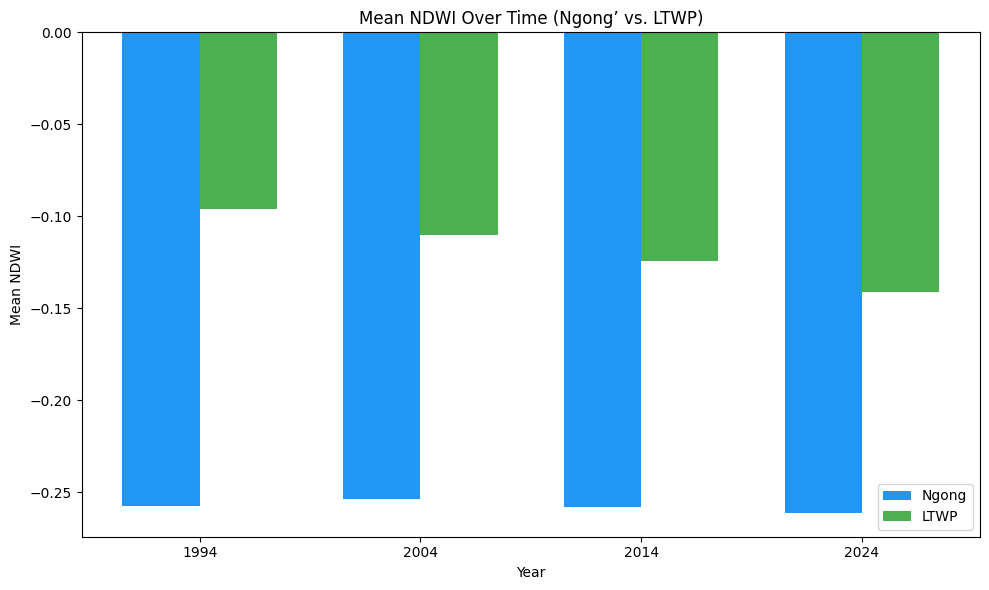

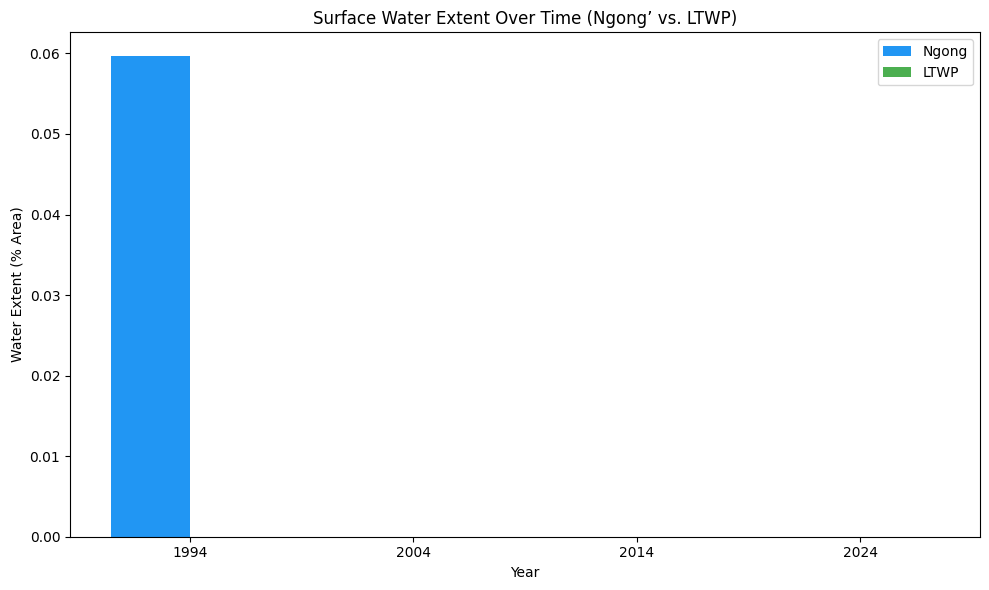

In [30]:
# Placeholder data (replace with GEE CSV)
df_ng_lst = pd.read_csv('./NDWI_WaterExtent_Ngong.csv')
df_ltwp_lst = pd.read_csv('./NDWI_WaterExtent_LTWP.csv')

# Mean NDWI chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_ng_lst['Year']))
plt.bar([i - bar_width/2 for i in x], df_ng_lst['NDWI'], bar_width, label='Ngong', color='#2196F3')
plt.bar([i + bar_width/2 for i in x], df_ltwp_lst['NDWI'], bar_width, label='LTWP', color='#4CAF50')
plt.xlabel('Year')
plt.ylabel('Mean NDWI')
plt.title('Mean NDWI Over Time (Ngong’ vs. LTWP)')
plt.xticks(x, df['Year'])
plt.legend()
plt.tight_layout()
plt.savefig('ndwi_comparison.png', dpi=300)
plt.show()

# Water extent % chart
plt.figure(figsize=(10, 6))
plt.bar([i - bar_width/2 for i in x], df_ng_lst['WaterPct'], bar_width, label='Ngong', color='#2196F3')
plt.bar([i + bar_width/2 for i in x], df_ltwp_lst['WaterPct'], bar_width, label='LTWP', color='#4CAF50')
plt.xlabel('Year')
plt.ylabel('Water Extent (% Area)')
plt.title('Surface Water Extent Over Time (Ngong’ vs. LTWP)')
plt.xticks(x, df['Year'])
plt.legend()
plt.tight_layout()
plt.savefig('water_extent_comparison.png', dpi=300)
plt.show()

In [35]:
list(df_ng_lst['NDWI'])

[-0.2573535383572308,
 -0.2537358979072609,
 -0.2580505738174409,
 -0.2609923019154809]

In [36]:
# Placeholder NDWI data
ngong_ndwi = np.array([-0.2573535383572308,
 -0.2537358979072609,
 -0.2580505738174409,
 -0.2609923019154809])
ltwp_ndwi = np.array([-0.0960705404250346,
 -0.1099645456233881,
 -0.1244001648763154,
 -0.1412815072863591])

# Mann-Kendall for NDWI trends
ngong_ndwi_trend = mk.original_test(ngong_ndwi)
print(f"Ngong' NDWI Trend: Tau={ngong_ndwi_trend.Tau}, p-value={ngong_ndwi_trend.p}")
ltwp_ndwi_trend = mk.original_test(ltwp_ndwi)
print(f"LTWP NDWI Trend: Tau={ltwp_ndwi_trend.Tau}, p-value={ltwp_ndwi_trend.p}")

# Paired t-test for NDWI differences
ngong_ndwi_diff = np.diff(ngong_ndwi)
ltwp_ndwi_diff = np.diff(ltwp_ndwi)
t_stat, p_value = ttest_rel(ngong_ndwi_diff, ltwp_ndwi_diff)
print(f"Paired t-test NDWI: t={t_stat}, p={p_value}")

Ngong' NDWI Trend: Tau=-0.6666666666666666, p-value=0.3081795474670539
LTWP NDWI Trend: Tau=-1.0, p-value=0.08942935902899363
Paired t-test NDWI: t=6.493907625687372, p=0.022901614113083953
